<a href="https://colab.research.google.com/github/olujerry/olujerry/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Car_sales = pd.read_csv('/content/monthly-car-sales.csv', parse_dates=['Month'])

In [3]:
Car_sales.head(10)

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
5,1960-06-01,13791
6,1960-07-01,9498
7,1960-08-01,8251
8,1960-09-01,7049
9,1960-10-01,9545


In [4]:
Car_sales = Car_sales.rename(columns={'Month' : 'ds', 'Sales' : 'y'}) 

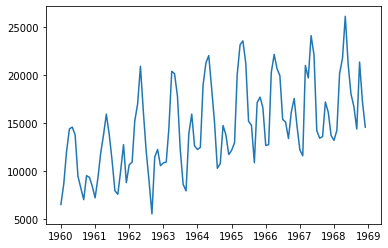

In [6]:
plt.plot(Car_sales['ds'], Car_sales['y'])
plt.show()

In [7]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install comet-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412 kB 8.6 MB/s 
     |████████████████████████████████| 162 kB 70.0 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 495 kB 62.2 MB/s 
     |████████████████████████████████| 140 kB 68.4 MB/s 
     |████████████████████████████████| 127 kB 40.4 MB/s 
     |████████████████████████████████| 162 kB 55.4 MB/s 
     |████████████████████████████████| 158 kB 45.3 MB/s 
     |████████████████████████████████| 157 kB 67.6 MB/s 
     |████████████████████████████████| 157 kB 56.2 MB/s 
     |████████████████████████████████| 157 kB 50.4 MB/s 
     |████████████████████████████████| 157 kB 57.2 MB/s 
     |████████████████████████████████| 157 kB 57.7 MB/s 
     |████████████████████████████████| 157 kB 56.1 MB/s 
     |██████████████████████████████

In [9]:
from comet_ml import Experiment
from prophet import Prophet

In [10]:
comet_string = """[comet] 
api_key=IhN8v4YhvdX6mlyf8OPr1Pb2o
project_name=Stock Price prediction
workspace=olujerry
"""
with open('.comet.config', 'w') as f:
    f.write(comet_string)

In [11]:
exp = Experiment()
Feature = Prophet()
Feature.fit(Car_sales)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/olujerry/stock-price-prediction/9fd164a717df442d9326eb57423aff9a

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7aatvow3/gszzuki7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7aatvow3/7478bh6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmds

In [12]:
N = 10 
future_Car_sales = Feature.make_future_dataframe(periods=N)
forecast = Feature.predict(future_Car_sales)

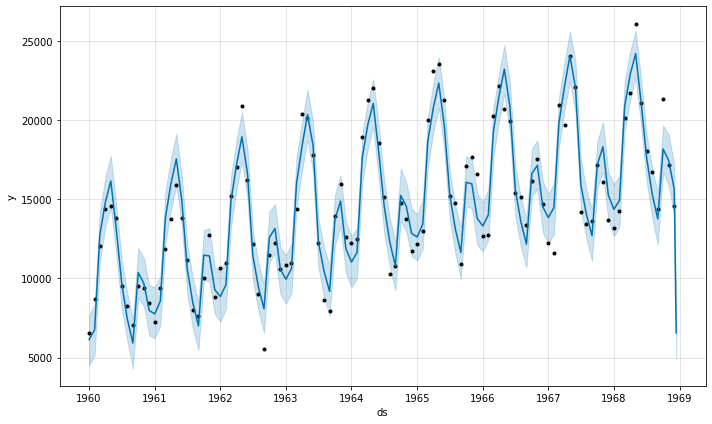

In [13]:
Feature.plot(forecast)
plt.show()

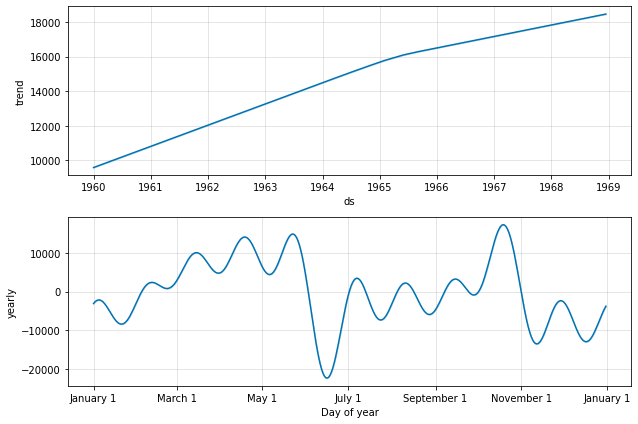

In [14]:
Feature.plot_components(forecast) 
plt.show()

In [15]:
exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/olujerry/stock-price-prediction/9fd164a717df442d9326eb57423aff9a
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1IGcNgYPr6hoEOYsObqQ9Eiq_q4_8Wquu
COMET INFO:   Parameters:
COMET INFO:     changepoint_prior_scale : 0.05
COMET INFO:     changepoint_range       : 0.8
COMET INFO:     changepoints            : 1
COMET INFO:     daily_seasonality       : auto
COMET INFO:     growth                  : linear
COMET INFO:     holidays                : 1
COMET INFO:     holidays_prior_scale    : 10.0
COMET INFO:     interval_width          : 0.8
COMET INFO:     mcmc_samples            : 0
COMET INFO:     n_changepoints          : 25
COMET INFO:     seasonality_mode        : additive
COMET INFO:     se